In [2]:
import torch

import torchvision.datasets as dset
import torchvision.transforms as transforms

cap = dset.CocoDetection(
    root = 'rico2coco/rico/dataset/images/',
    annFile = 'dataset/ricoco_clickable.json',
    transform=transforms.ToTensor()
)

print('Number of samples: ', len(cap))
img, target = cap[3] # load 4th sample

print("Image Size: ", img.size())
print(target)

loading annotations into memory...
Done (t=1.67s)
creating index...
index created!
Number of samples:  24598
Image Size:  torch.Size([3, 1920, 1080])
[{'id': 45, 'image_id': 4, 'category_id': 2, 'bbox': [0.0, 0.0, 1080.0, 1920.0], 'area': 2073600.0, 'iscrowd': 0, 'ignore': 0, 'segmentation': []}, {'id': 46, 'image_id': 4, 'category_id': 2, 'bbox': [0.0, 63.0, 1080.0, 147.0], 'area': 158760.0, 'iscrowd': 0, 'ignore': 0, 'segmentation': []}, {'id': 47, 'image_id': 4, 'category_id': 2, 'bbox': [42.0, 101.25, 198.75, 69.75], 'area': 13862.8125, 'iscrowd': 0, 'ignore': 0, 'segmentation': []}, {'id': 48, 'image_id': 4, 'category_id': 1, 'bbox': [849.0, 73.5, 126.0, 126.0], 'area': 15876.0, 'iscrowd': 0, 'ignore': 0, 'segmentation': []}, {'id': 49, 'image_id': 4, 'category_id': 1, 'bbox': [975.0, 73.5, 105.0, 126.0], 'area': 13230.0, 'iscrowd': 0, 'ignore': 0, 'segmentation': []}, {'id': 50, 'image_id': 4, 'category_id': 2, 'bbox': [0.0, 1636.5, 1080.0, 10.5], 'area': 11340.0, 'iscrowd': 0, '

In [3]:
data_loader = torch.utils.data.DataLoader(cap,
                                          batch_size=4,
                                          shuffle=True,)

# yolov5

In [4]:
import torch
from PIL import Image


# # def copy_attr(a, b, include=(), exclude=()):
# #     # Copy attributes from b to a, options to only include [...] and to exclude [...]
# #     for k, v in b.__dict__.items():
# #         if (len(include) and k not in include) or k.startswith('_') or k in exclude:
# #             continue
# #         else:
# #             setattr(a, k, v)

# # my network so slow that I can't download your model above successfully :(
# # so I just use ultralytics's pretrained model here 
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=False, classes=2)
# checkpoint_ = torch.load('android-env/rico2coco_click_best.pt')['model']
# model.load_state_dict(checkpoint_.state_dict())

# # copy_attr(model, checkpoint_, include=('yaml', 'nc', 'hyp', 'names', 'stride'), exclude=())

# model = model.fuse().autoshape()

model = torch.hub.load('ultralytics/yolov5', 'custom', path='android-env/rico2coco_click_best.pt')

Using cache found in /home/rhd/.cache/torch/hub/ultralytics_yolov5_master


  0%|          | 0.00/755k [00:00<?, ?B/s]

YOLOv5 🚀 2021-8-30 torch 1.9.0+cu102 CUDA:0 (GeForce GTX 1070, 8118.25MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

# Sample prediction

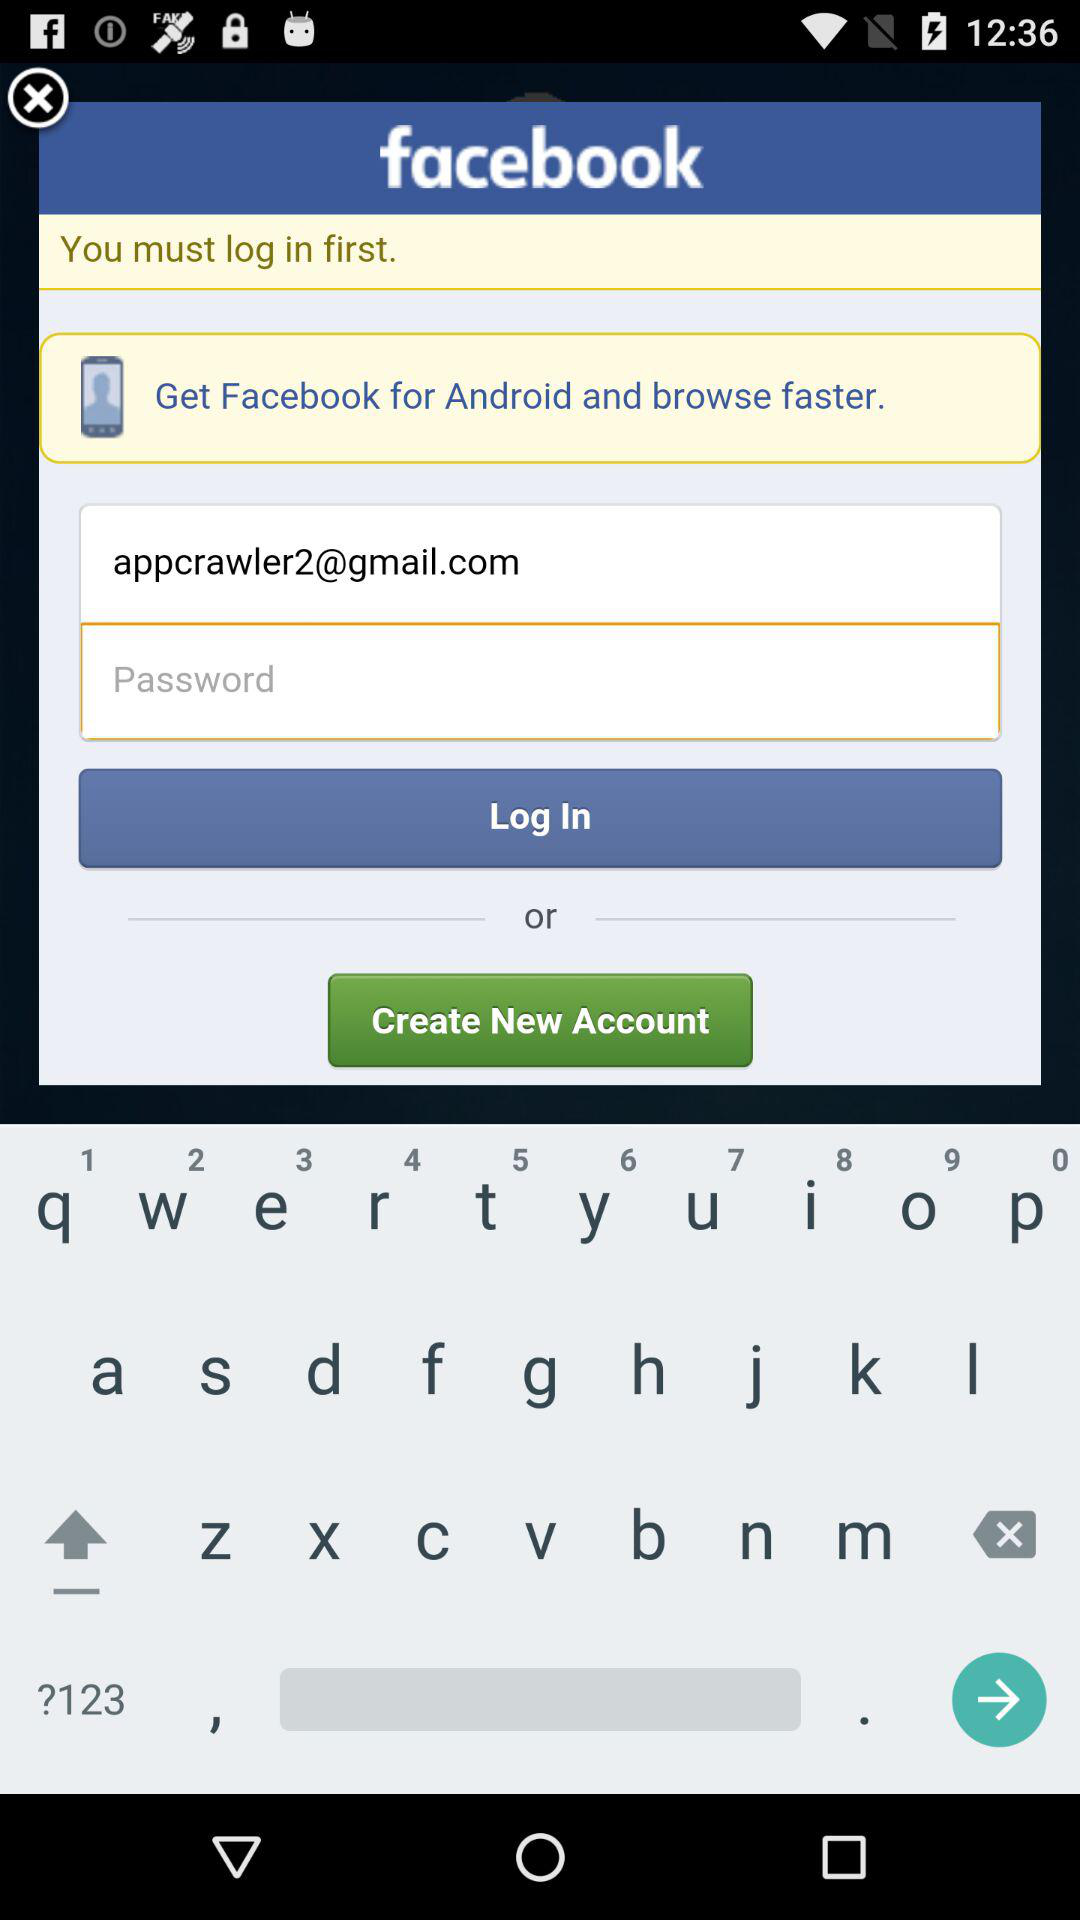

In [6]:
img = Image.open('rico2coco/rico/dataset/images/92.jpg')
img

In [10]:
model.conf = .6
output = model(img, size=640)
output.print()

image 1/1: 1920x1080 4 clickables, 1 not_clickable
Speed: 7.4ms pre-process, 11.1ms inference, 1.8ms NMS per image at shape (1, 3, 640, 384)


In [11]:
output.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,312.750,970.50,789.00,1068.00,0.718750,0,clickable
1,26.250,96.00,1031.25,1195.50,0.715332,1,not_clickable
2,87.750,765.75,1011.75,867.75,0.671875,0,clickable
3,67.500,629.25,1000.50,749.25,0.626953,0,clickable
4,64.875,503.25,1000.50,626.25,0.608887,0,clickable


In [13]:
output.save()
output.show()

Saved 1 image to runs/detect/exp2
